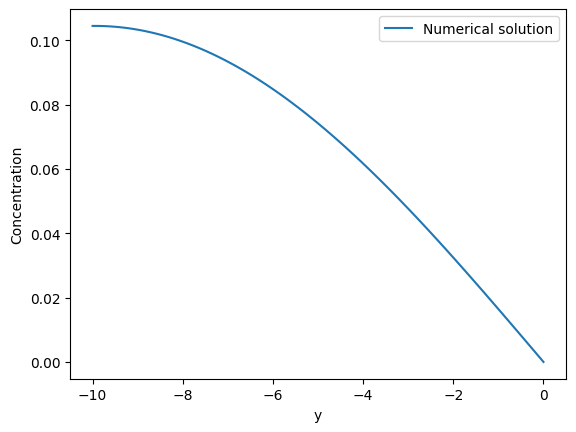

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
D = 1.0
L = 10.0
Csat = 1.0
N = 100  # number of grid points
dy = L / (N - 1)
dt = 0.5 * dy**2 / D  # time step (stability condition)
T = 100  # total simulation time
nt = int(T / dt)

# Initialize the grid
y = np.linspace(-L, 0, N)
C = np.zeros(N)
C[1:-1] = Csat

# Time-stepping loop
for t in range(nt):
    C[1:-1] += D * dt / dy**2 * (C[2:] - 2 * C[1:-1] + C[:-2])
    C[0] = C[1]  # Neumann boundary condition at y = 0
    C[-1] = 0  # Dirichlet boundary condition at y = -L

# Plot the solution
plt.plot(y, C, label="Numerical solution")
plt.xlabel("y")
plt.ylabel("Concentration")
plt.legend()
plt.show()


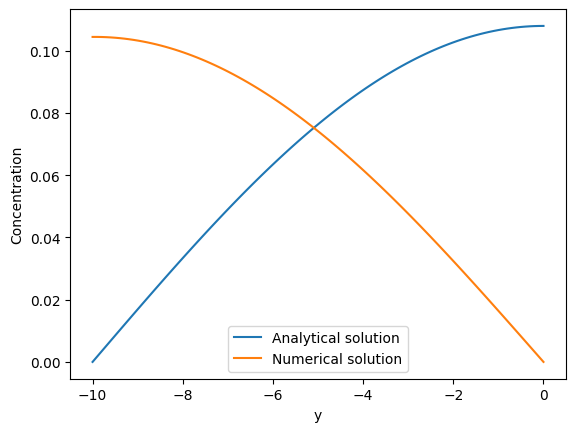

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def analytical_solution(y, t, D, L, Csat, n_terms):
    C = np.zeros_like(y)
    for n in range(1, n_terms * 2, 2):  # Iterate over odd terms only
        coef = 4 / (n * np.pi) * ((-1) ** ((n + 3) // 2))
        C += coef * np.cos(n * np.pi * y / (2 * L)) * np.exp(-((n * np.pi / (2 * L)) ** 2) * D * t)
    return C * Csat

# Parameters
D = 1.0
L = 10.0
Csat = 1.0
N = 100  # number of grid points
n_terms = 100  # number of terms in the analytical solution

# Create a y-grid for both numerical and analytical solutions
y = np.linspace(-L, 0, N)

# Calculate the analytical solution
T = 100  # total simulation time
C_analytical = analytical_solution(y, T, D, L, Csat, n_terms)

# Plot the analytical solution
plt.plot(y, C_analytical, label="Analytical solution")

# Numerical solution (same as the previous code snippet)
dy = L / (N - 1)
dt = 0.5 * dy**2 / D
nt = int(T / dt)
C = np.zeros(N)
C[1:-1] = Csat
for t in range(nt):
    C[1:-1] += D * dt / dy**2 * (C[2:] - 2 * C[1:-1] + C[:-2])
    C[0] = C[1]
    C[-1] = 0

# Plot the numerical solution
plt.plot(y, C, label="Numerical solution")

# Customize and show the plot
plt.xlabel("y")
plt.ylabel("Concentration")
plt.legend()
plt.show()


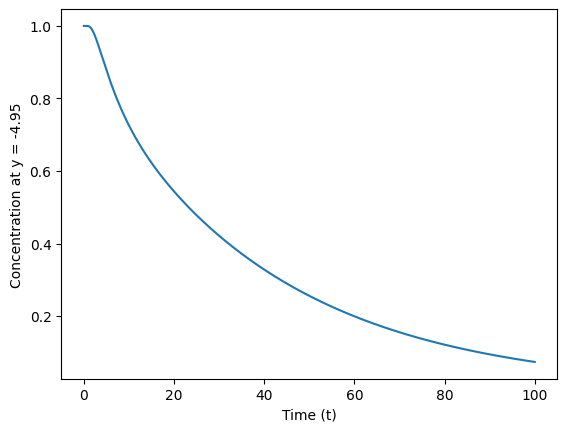

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
D = 1.0
L = 10.0
Csat = 1.0
N = 100  # number of grid points
dy = L / (N - 1)
dt = 0.5 * dy**2 / D  # time step (stability condition)
T = 100  # total simulation time
nt = int(T / dt)

# Initialize the grid
y = np.linspace(-L, 0, N)
C = np.zeros(N)
C[1:-1] = Csat

# Initialize an array to store concentration data over time
C_t = np.zeros((N, nt))

# Time-stepping loop
for t in range(nt):
    C[1:-1] += D * dt / dy**2 * (C[2:] - 2 * C[1:-1] + C[:-2])
    C[0] = C[1]  # Neumann boundary condition at y = 0
    C[-1] = 0  # Dirichlet boundary condition at y = -L
    
    # Store the concentration data at this time step
    C_t[:, t] = C

# Choose a specific spatial location to plot C vs t
y_idx = int(N / 2)  # Choose the middle point of the grid as an example

# Plot the concentration over time for the chosen spatial location
plt.plot(np.arange(nt) * dt, C_t[y_idx, :])
plt.xlabel("Time (t)")
plt.ylabel(f"Concentration at y = {y[y_idx]:.2f}")
plt.show()


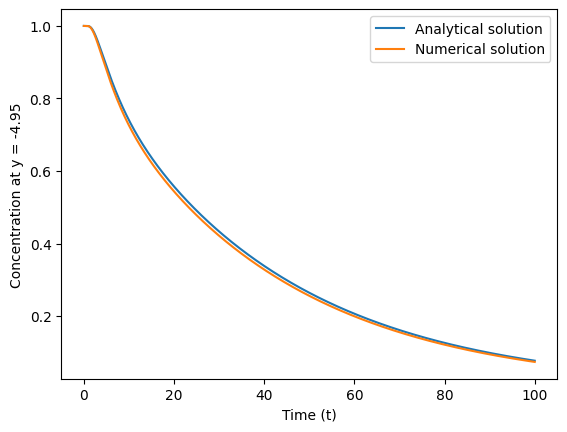

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def analytical_solution(y, t, D, L, Csat, n_terms):
    C = np.zeros_like(y)
    for n in range(1, n_terms * 2, 2):  # Iterate over odd terms only
        coef = 4 / (n * np.pi) * ((-1) ** ((n + 3) // 2))
        C += coef * np.cos(n * np.pi * y / (2 * L)) * np.exp(-((n * np.pi / (2 * L)) ** 2) * D * t)
    return C * Csat

# Parameters
D = 1.0
L = 10.0
Csat = 1.0
N = 100  # number of grid points
n_terms = 100  # number of terms in the analytical solution
dy = L / (N - 1)
dt = 0.5 * dy**2 / D  # time step (stability condition)
T = 100  # total simulation time
nt = int(T / dt)

# Create a y-grid for both numerical and analytical solutions
y = np.linspace(-L, 0, N)

# Choose a specific spatial location to plot C vs t
y_idx = int(N / 2)  # Choose the middle point of the grid as an example

# Calculate the analytical solution at the chosen spatial location for each time step
t_values = np.arange(nt) * dt
C_analytical_t = np.array([analytical_solution(y[y_idx], t, D, L, Csat, n_terms) for t in t_values])

# Plot the analytical solution
plt.plot(t_values, C_analytical_t, label="Analytical solution")

# Numerical solution (same as the previous code snippet)
C = np.zeros(N)
C[1:-1] = Csat
C_t = np.zeros((N, nt))
for t in range(nt):
    C[1:-1] += D * dt / dy**2 * (C[2:] - 2 * C[1:-1] + C[:-2])
    C[0] = C[1]
    C[-1] = 0
    C_t[:, t] = C

# Plot the numerical solution
plt.plot(t_values, C_t[y_idx, :], label="Numerical solution")

# Customize and show the plot
plt.xlabel("Time (t)")
plt.ylabel(f"Concentration at y = {y[y_idx]:.2f}")
plt.legend()
plt.show()
